# Week 4 Example of plotting using pandas & matplotlib
First we will import pandas & matplotlib

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Data is Global Cybersecurity Threats (2015-2024) pulled from kaggle - https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024?resource=download the .csv was downloaded and put in the data folder.

In [45]:
# Read the CSV file into DataFrame
df = pd.read_csv('data\Global_Cybersecurity_Threats_2015-2024.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Print Column Names to verify them
print(df.columns)

# Print first 5 rows just to check
print(df.head())



Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')
   Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          41.44                    659320  Nat

<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
C:\Users\point\AppData\Local\Temp\ipykernel_8836\2322847399.py:2: SyntaxWarning: invalid escape sequence '\G'
  df = pd.read_csv('data\Global_Cybersecurity_Threats_2015-2024.csv')


Break down of Attack Type

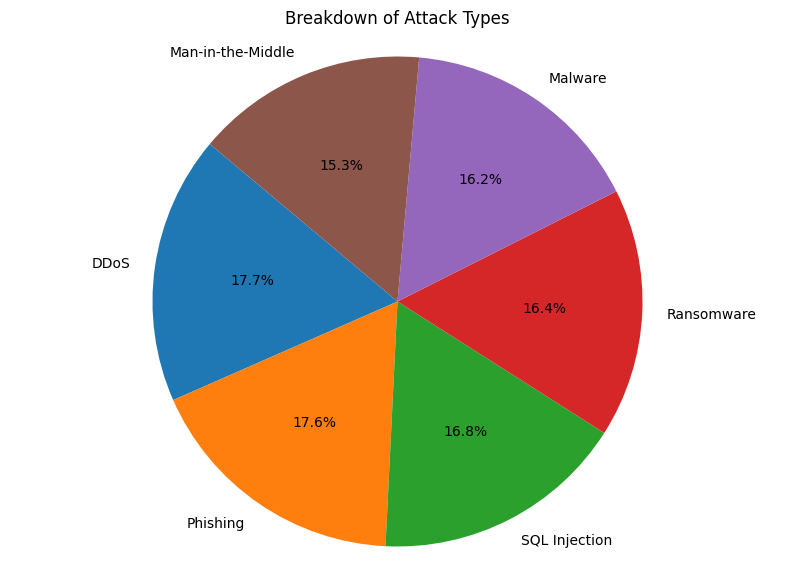

In [46]:
# Count the occurrences of each Attack Type
attack_counts = df['Attack Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(attack_counts, labels=attack_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Breakdown of Attack Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()

It appears to be a fairly even split between the attack types.  I wonder if a break down of attack types vs year would show any trend in attack types

<Figure size 1200x600 with 0 Axes>

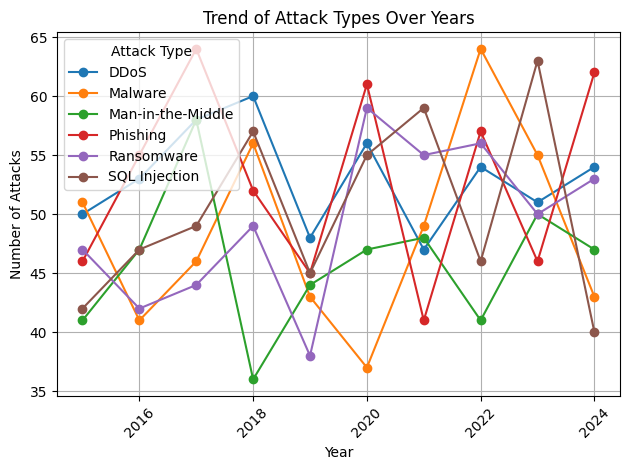

In [47]:
# Group by Year and Attack Type, counting occurrences
attack_trend = df.groupby(['Year', 'Attack Type']).size().unstack(fill_value=0)

# Plotting the trend
plt.figure(figsize=(12, 6))
attack_trend.plot(kind='line', marker='o')
plt.title('Trend of Attack Types Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.legend(title='Attack Type')
plt.grid()
plt.tight_layout()
plt.show()

This isn't as easy to read and looks a bit of a mess, trying to do it as a bar chart to see if that helps make it clearer.

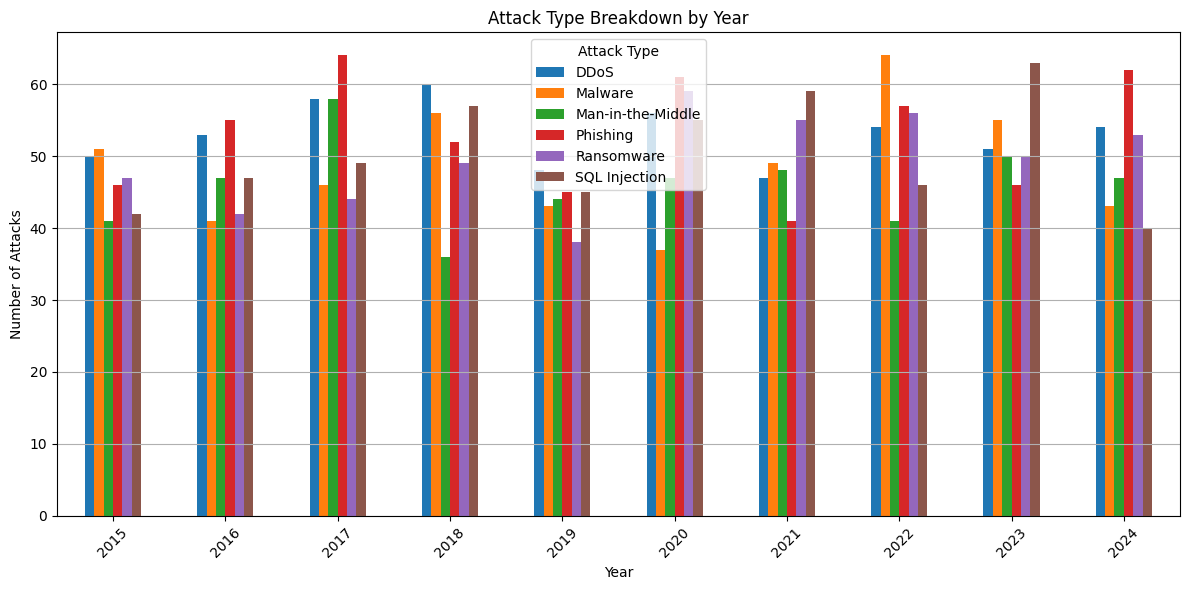

In [48]:
# Plotting the bar chart
attack_trend.plot(kind='bar', figsize=(12, 6))
plt.title('Attack Type Breakdown by Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.legend(title='Attack Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

That isn't really better so going to try with Seaborn

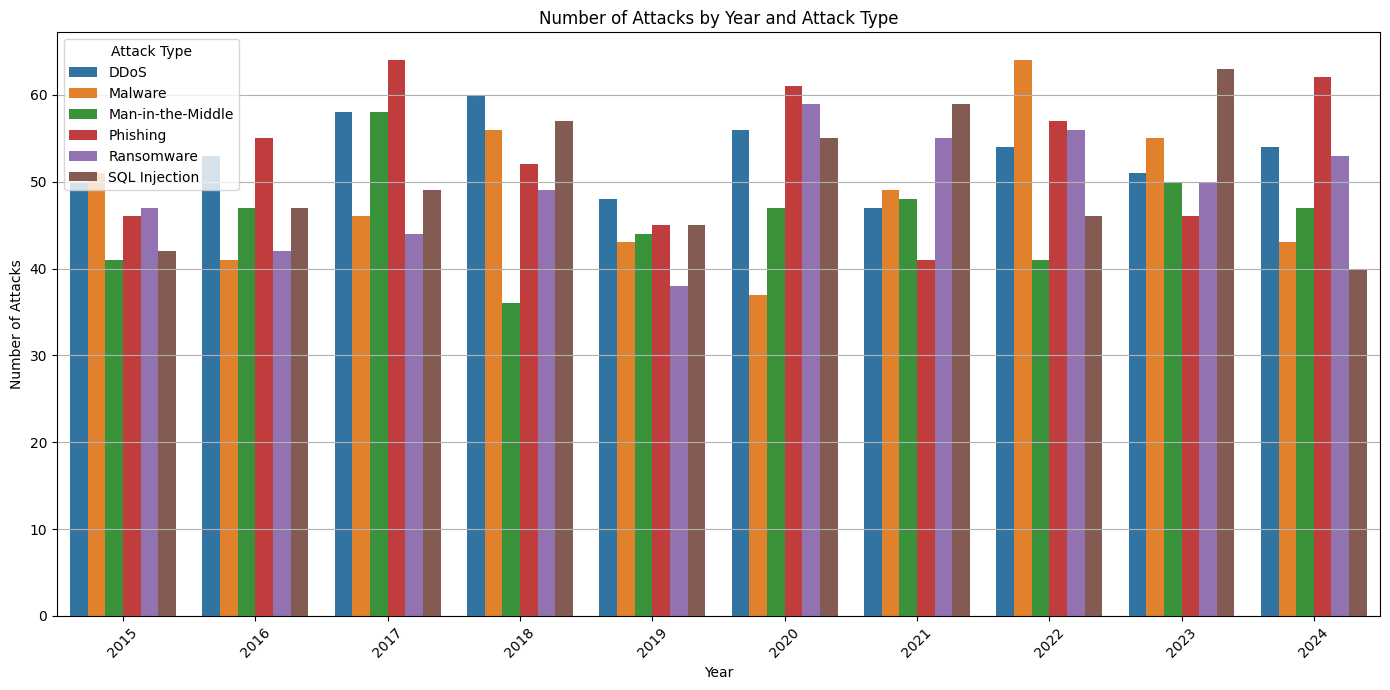

In [51]:
# Create a count of attacks by Year and Attack Type
attack_counts = df.groupby(['Year', 'Attack Type']).size().reset_index(name='Count')

# Create a bar plot using Seaborn
plt.figure(figsize=(14, 7))
sns.barplot(data=attack_counts, x='Year', y='Count', hue='Attack Type')
plt.title('Number of Attacks by Year and Attack Type')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.legend(title='Attack Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

That is a bit easier to see than the matplotlib but doesn't really help make reading the data any more clear.  Perhaps a stacked bar chart would help?

<Figure size 1400x700 with 0 Axes>

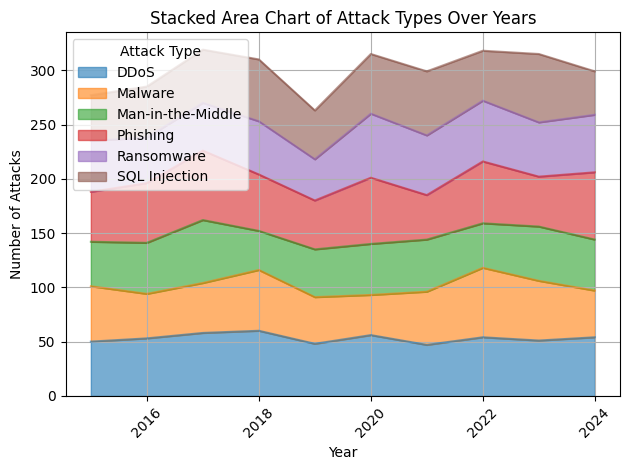

In [49]:
# Plotting the stacked area chart
plt.figure(figsize=(14, 7))
attack_trend.plot(kind='area', stacked=True, alpha=0.6)
plt.title('Stacked Area Chart of Attack Types Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.legend(title='Attack Type')
plt.grid()
plt.tight_layout()
plt.show()

This is easier to read in some ways and shows relation to the overall number of attacks but still as clear as I would like. Seeing if there are other options that would help.

C:\Users\point\AppData\Local\Temp\ipykernel_8836\3015186740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attack Type', y='Financial Loss (in Million $)', palette='Set2')


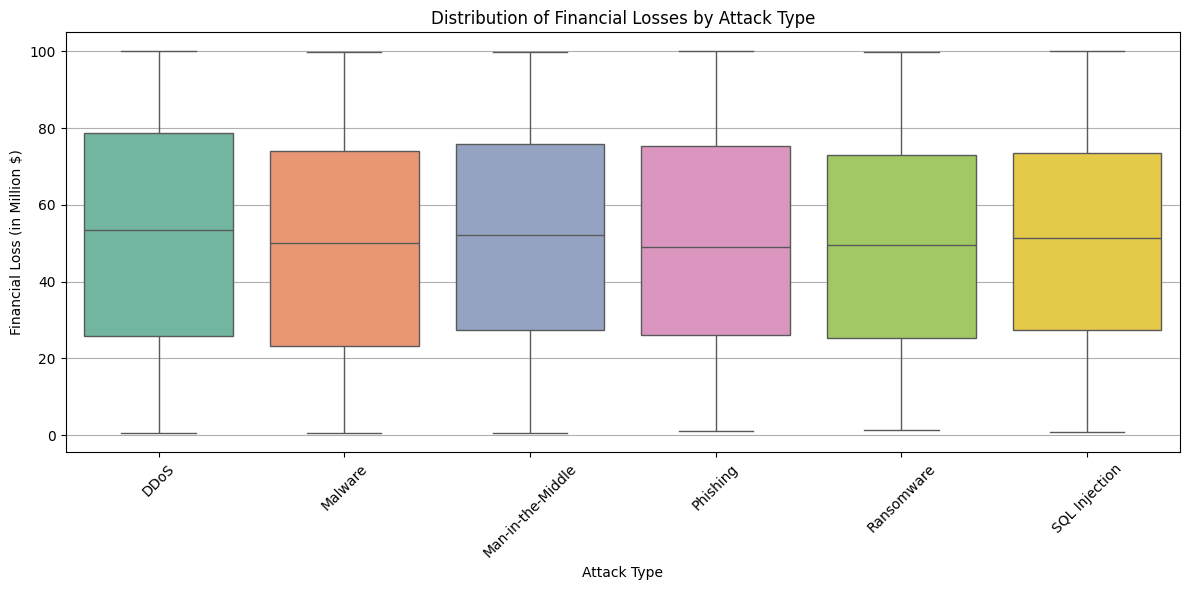

In [53]:
# Create a box plot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Attack Type', y='Financial Loss (in Million $)', palette='Set2')
plt.title('Distribution of Financial Losses by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Financial Loss (in Million $)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

While interesting to start looking at monetary loss tied to attack type instead of year it still doesn't paint a clear picture.

C:\Users\point\AppData\Local\Temp\ipykernel_8836\3264456694.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attack_counts = df.groupby(['Country', 'Attack Type']).size().reset_index(name='Count')


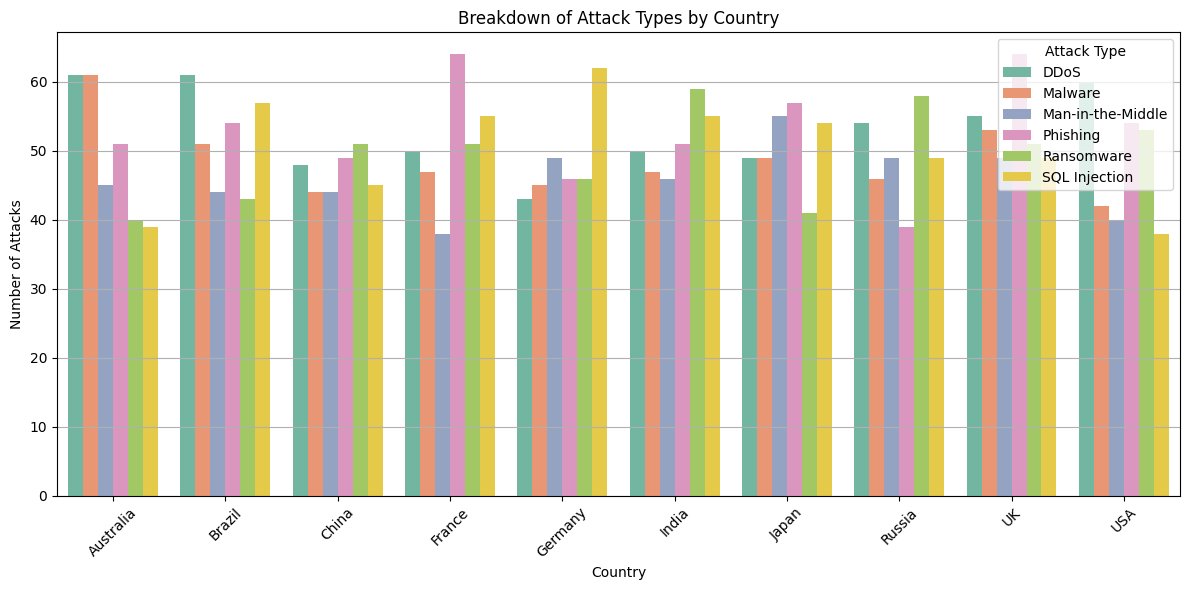

In [57]:
# Create a count of attacks by Country and Attack Type
attack_counts = df.groupby(['Country', 'Attack Type']).size().reset_index(name='Count')

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=attack_counts, x='Country', y='Count', hue='Attack Type', palette='Set2')
plt.title('Breakdown of Attack Types by Country')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.legend(title='Attack Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Interesting to see the break down of attack type by country and I appreciate the more subtle colors here but wondering if a stacked chart would be better as it could show the overall number of attacks per country to see if there are countries with more attacks.

C:\Users\point\AppData\Local\Temp\ipykernel_8836\1662637041.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attack_counts = df.groupby(['Country', 'Attack Type']).size().unstack(fill_value=0)


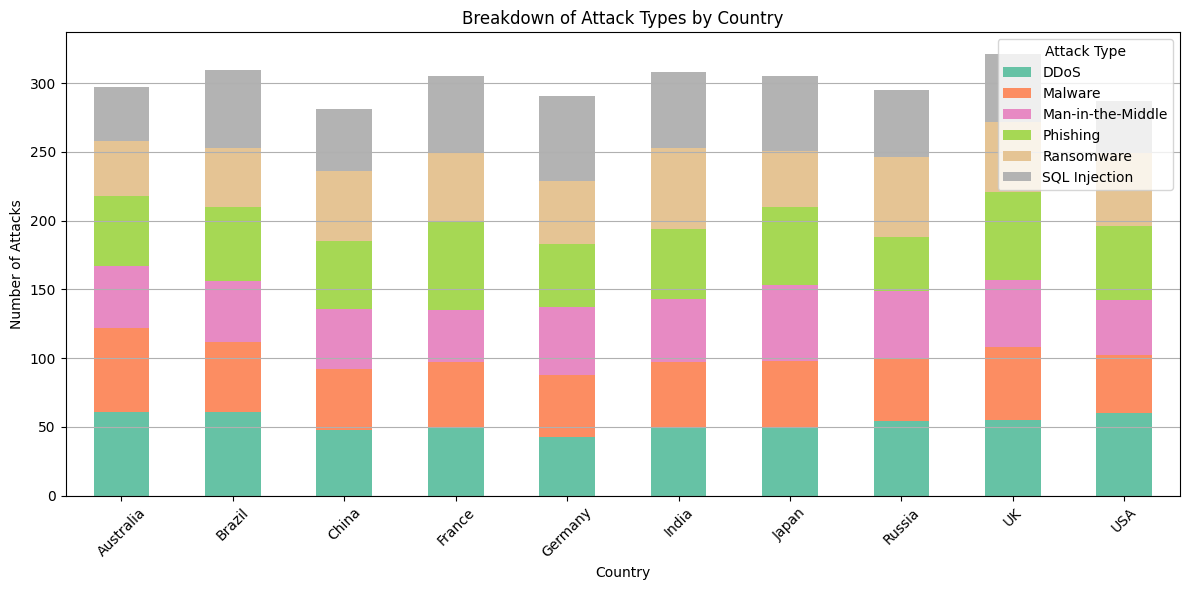

In [61]:
# Create a count of attacks by Country and Attack Type
attack_counts = df.groupby(['Country', 'Attack Type']).size().unstack(fill_value=0)

# Create a stacked column chart
attack_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Breakdown of Attack Types by Country')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.legend(title='Attack Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

This helps some as far as telling us that the over all number of attacks is not significantly higher for one country over another.  I wonder if there is a difference in financial loss depending on country.

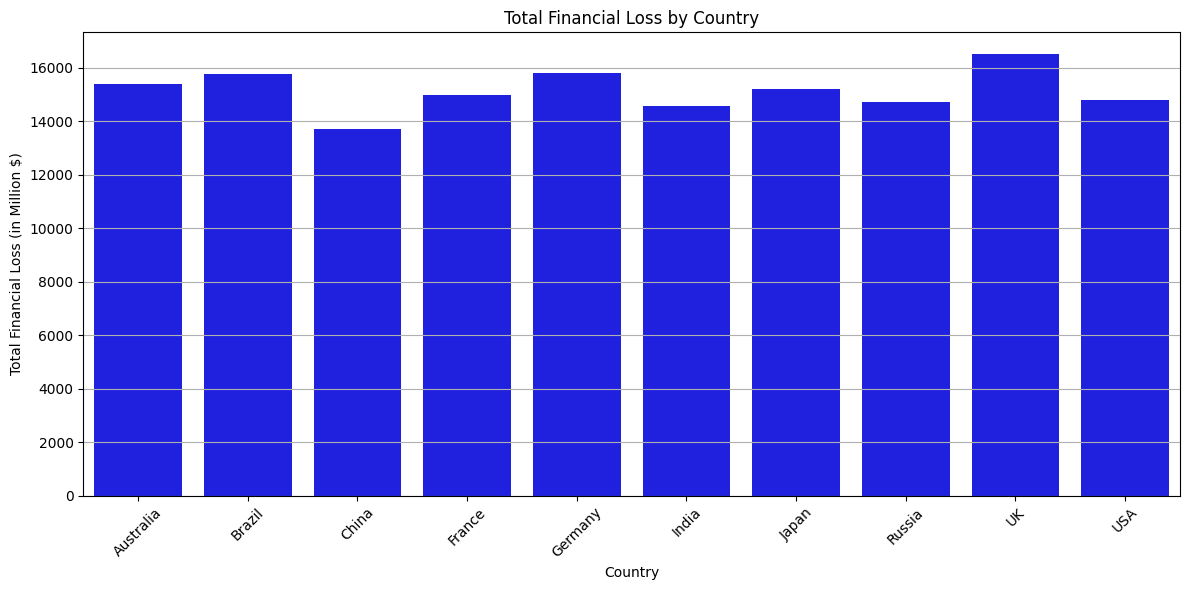

In [63]:
# Calculate total financial loss by country
total_loss_by_country = df.groupby('Country')['Financial Loss (in Million $)'].sum().reset_index()

# Create a bar plot for total financial loss by country
plt.figure(figsize=(12, 6))
sns.barplot(data=total_loss_by_country, x='Country', y='Financial Loss (in Million $)', color='blue')
plt.title('Total Financial Loss by Country')
plt.xlabel('Country')
plt.ylabel('Total Financial Loss (in Million $)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Doesn't appear to be any significant differences between countries for financial losses.  While I still have a lot to learn and definately used google etc. for a lot of help in putting these together I am feeling more confident that I worked through issues and errors and am starting to be able to plot data.  Still a long way to go but progress is being made and I appreciate all I've learned so far in Code You.